<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# First thing to do is import necessary librarys for cleaning our Data 
# and Creating Features
import pandas as pd
import numpy as np



---



---



In [0]:
# Take a look at the Ames Iowa Housing Dataset:
src_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

# Read the data file from the src_url variable into a pandas DataFrame
iowa_housing_df = pd.read_csv(src_url)

# Display the first 10 rows to see if the DataFrame was made
print("Top 10 Rows of iowa_housing_df: ")
display(iowa_housing_df.head(10))

# Display the shape of iowa_housing_df
print("\niowa_housing_df shape: ")
display(iowa_housing_df.shape) 

Top 10 Rows of iowa_housing_df: 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,


iowa_housing_df shape: 


(1460, 81)

In [0]:
# Using the describe function to get a statistical description of my data
print("Basic Statistical Description: \n")
display(iowa_housing_df.describe())

# Just to show that I can get descriptions of specified columns:
print("\n\nSpecified Columns Description: \n")
display(iowa_housing_df[['OverallQual','YearBuilt']].describe())

Basic Statistical Description: 



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000




Specified Columns Description: 



,OverallQual,YearBuilt
count,1460.000000,1460.000000
mean,6.099315,1971.267808
std,1.382997,30.202904
min,1.000000,1872.000000
25%,5.000000,1954.000000
50%,6.000000,1973.000000
75%,7.000000,2000.000000
max,10.000000,2010.000000


In [0]:
# Displaying the data types of each column.
pd.set_option('display.max_rows', 150)
display(iowa_housing_df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
# Lets take a look at the first 10 rows of the 'BedroomAbvGr' column.
ihdf_type = iowa_housing_df['BedroomAbvGr'].dtype

# Just for fun I will use an if statement to check if its an integer.
if ihdf_type == 'int64' or ihdf_type == 'int32':
    print("Yes it's an integer")
    print("Data Type: ",ihdf_type)

Yes it's an integer
Data Type:  int64


In [0]:
# Another way to call columns is wuth a dot method.
iowa_housing_df.Fireplaces.head(10)

# I don't like calling columns this way, because it could possibly interfear
# with other predefined methods if they have the same name.

# Seems to be a like minded opinion amongst the forums

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    2
8    2
9    2
Name: Fireplaces, dtype: int64

In [0]:
# Here is how to call specific columns using []
iowa_housing_df['Fireplaces'].head(10)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    2
8    2
9    2
Name: Fireplaces, dtype: int64

In [0]:
# I was curious to see which one would be interprited faster so I ran the 
# shell command '%timeit'
%timeit iowa_housing_df.Fireplaces.head(10)
%timeit iowa_housing_df['Fireplaces'].head(10)
print("Using df['col'] is faster on average by ", 51.9-47.9,"micro-seconds.")
# So if my previous opinion on not useing '.' to select columns wasn't enough
# to convince you. 
# Using '[]' is also faster, not by much, but still.

The slowest run took 6.50 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 49.8 µs per loop
10000 loops, best of 3: 44.5 µs per loop
Using df['col'] is faster on average by  4.0 micro-seconds.


In [0]:
# Now let's see how selecting multiple columns looks.
# Indtead of using a list '[]' 
# I will use '[[col,col]]' to create a 2d array
iowa_housing_df[['Fireplaces', 'BedroomAbvGr']].sample(10)

,Fireplaces,BedroomAbvGr
1425,0,3
456,0,4
1428,2,2
817,2,3
81,0,2
874,0,3
538,1,3
452,0,3
520,0,3
1310,2,3


In [0]:
# Looking at the first ten rows of the 'LotFrontage' column.
ihdflf = iowa_housing_df['LotFrontage']
print("Top 10 rows of iowa_housing_df['LotFrontage']: \n")
display(ihdflf.head(10))
# If statement to tell me if the dtype is a float or an int
if ihdflf.dtype == 'int64':
    print("\nIt's an integer!")
elif ihdflf.dtype == 'float64':
    print("\nIt's a float")     

Top 10 rows of iowa_housing_df['LotFrontage']: 



0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64


It's a float


In [0]:
# Let's take a look at all possible valus in this column
display(iowa_housing_df['LotFrontage'].value_counts(dropna=False))
# By setting dropna to False it counts the NaN values as well.

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [0]:
# The reason that it is float dtype is, because if there is a NaN
# value amongst a column of integers it will read the NaN value as a float.

# To confirm this we can call the nan instance from the numpy library as a 
# parameter for python built-in type function
type(np.nan) #---- Ouputes 'float'

float

In [0]:
# Ways to check for missing values in pandas:
# 1. We can call the is null method on our dataframe to get all instances of
#    a NaN value. Then call the sum() method to add up the amount of missing
#    values. 
print("Total NaN values: ",iowa_housing_df['LotFrontage'].isnull().sum())
# 2. We can call the isna() method also to get the same output.
print("\nTotal NaN values: ", iowa_housing_df['LotFrontage'].isna().sum())

Total NaN values:  259

Total NaN values:  259




---



---



## Making New Features

In [0]:
# Now to make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
# Here we will use the copy() function to copy the selected columns to a new dataframe.
small_iowa_df = iowa_housing_df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']].copy()
# Lets take a look at our new dataframe:
small_iowa_df.sample(10)
# It works!!

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
385,1256,1269,0,192000
180,756,769,756,177000
236,1414,1414,0,185500
1326,544,774,0,79000
896,951,951,0,106500
856,940,1026,0,147000
39,0,1152,0,82000
186,1188,1217,0,173000
456,624,624,720,98000
35,1117,1132,1320,309000


In [0]:
# Now lets make some new column for or small_iowa_df 

# First we need to make a new colun name to describe what it will be.
# Here it will just be a total of a houses Square Footage
# So we will add our single floor SF columns together like so:
small_iowa_df['TotalSF'] = small_iowa_df['TotalBsmtSF']+small_iowa_df['1stFlrSF']+small_iowa_df['2ndFlrSF']

# Now lets display the results.
small_iowa_df.head(10)
# Confirmed that our new column 'TotalSF' is now part of the DataFrame

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343
5,796,796,566,143000,2158
6,1686,1694,0,307000,3380
7,1107,1107,983,200000,3197
8,952,1022,752,129900,2726
9,991,1077,0,118000,2068


In [0]:
# Now to create another new column for our small_iowa_df
# This column will be the price/sqrft
small_iowa_df['Price/SF'] = small_iowa_df['SalePrice'] / small_iowa_df['TotalSF']

# Now lets display to confirm changes
small_iowa_df.head(10)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,Price/SF
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129
5,796,796,566,143000,2158,66.265060
6,1686,1694,0,307000,3380,90.828402
7,1107,1107,983,200000,3197,62.558649
8,952,1022,752,129900,2726,47.652238
9,991,1077,0,118000,2068,57.059961


### Questons About `small_iowa_df`:
- What does a high `Price/SF` say about a home that the square footage and price alone don't capture as dirctly?
  - ### Answer: 
    It shows the comparison between the 2 so we can see if there is any corralation. One trend we can observe is that the more `SqrFt` the higher the `Price`. 

- What does a low `Price/SF` say about a home that the square footage and price alone don't directly capture?
  - ### Answer:
    Less `SqrFt` means lowere `Price`



---



---



## Crosstabs
  - Focus on catagorical data

  -### **Catagorical Data**
    - Catagorical variables represent types of data which may be divided into groups.
    - **Examples:** race,sex,age group, education level, skill set, etc...

In [0]:
# Let's display our data frame columns by calling 
# (iowa_housing_df.columns) instance.
iowa_housing_df.columns
# This gives us an object that is made up of a list of all the DataFrame 
# headers.

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
# Now we can go and select some catagorical columns.
print("Here are some catagorical columns we can look at: \n")
iowa_housing_df[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(10)

Here are some catagorical columns we can look at: 



,LotShape,Alley,Street,SaleCondition
997,IR1,NaN,Pave,Normal
439,Reg,Grvl,Pave,Normal
1005,Reg,NaN,Pave,Normal
989,Reg,NaN,Pave,Partial
1051,IR1,NaN,Pave,Partial
1046,IR1,NaN,Pave,Partial
918,IR1,NaN,Pave,Normal
85,Reg,NaN,Pave,Normal
1320,Reg,NaN,Pave,Normal
247,Reg,NaN,Pave,Normal


In [0]:
# Here we will take a look at individule values of sales conditions
iowa_housing_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
# Now let's create a new categorical variable
# We can use the np.where function to do a conditional search, 
# similar to SQL.
iowa_housing_df['NormalCondition'] = np.where(iowa_housing_df['SaleCondition']
                                              == 'Normal', 1, 0)
# After we have made a column by getting all the 'Normal' values from 'SaleCondition'
# we can now view them.
display(iowa_housing_df['NormalCondition'].value_counts())
print("\n1 = (count of 'Normal' values)\n2 = (count of non normal values)")

1    1198
0     262
Name: NormalCondition, dtype: int64


1 = (count of 'Normal' values)
2 = (count of non normal values)


In [0]:
# Check the value counts of 'LotShape' 
iowa_housing_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
# Using pythons built in map() method we can narrow 4 values down to 3.
# .map() uses dict{key:value} to map the values
iowa_housing_df['LotShape3'] = iowa_housing_df['LotShape'].map({'Reg':'Regular',
                                                     'IR1':'Irregular',
                                                     'IR2':'Other',
                                                     'IR3':'Other'})
# Display changes
iowa_housing_df['LotShape3'].value_counts()


Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [0]:
# Let's do value counts of another categorical variable
iowa_housing_df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [0]:
# Lets take a look at another way to map catagorical variables, shall we?

iowa_housing_df['top_neighbors']='All Others'
iowa_housing_df[['top_neighbors', 'Neighborhood']].head(10) 

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge
5,All Others,Mitchel
6,All Others,Somerst
7,All Others,NWAmes
8,All Others,OldTown
9,All Others,BrkSide


In [0]:
# Now we can do some mapping with .loc
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='NAmes', 'top_neighbors']='North Ames'
iowa_housing_df[['top_neighbors','Neighborhood']].sample(10) 

,top_neighbors,Neighborhood
1245,All Others,NWAmes
948,All Others,CollgCr
123,All Others,SawyerW
1054,All Others,CollgCr
256,All Others,Somerst
233,All Others,CollgCr
31,All Others,Sawyer
1311,All Others,CollgCr
892,All Others,Sawyer
236,All Others,CollgCr


In [0]:
# This can be done multiple times if the solution calls for it.
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='CollgCr','top_neighbors']='College Circle'
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='Gilbert','top_neighbors']='Favorite Neighborhood'
iowa_housing_df.loc[iowa_housing_df['Neighborhood']=='Somerst','top_neighbors']='Favorite Neighborhood'
# Now let's check to see if all the values were mapped correctly
iowa_housing_df[['top_neighbors','Neighborhood']].sample(10)

,top_neighbors,Neighborhood
1142,College Circle,CollgCr
1446,All Others,Mitchel
945,All Others,OldTown
196,Favorite Neighborhood,Somerst
1286,All Others,NWAmes
808,North Ames,NAmes
1393,All Others,OldTown
473,All Others,NridgHt
692,All Others,Timber
975,Favorite Neighborhood,Somerst


In [0]:
# Crosstab time! WOOHOO!!
pd.crosstab(iowa_housing_df['top_neighbors'], iowa_housing_df['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [0]:
# Lets do that again except using the margins= argument and set it to:
# margins=True to get a column that shows All counts

# Normalize index:
pd.crosstab(iowa_housing_df['top_neighbors'],iowa_housing_df['LotShape3'],
            normalize='index', margins=True)
# Normalize column:
pd.crosstab(iowa_housing_df['top_neighbors'],iowa_housing_df['LotShape3'],
            normalize='columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


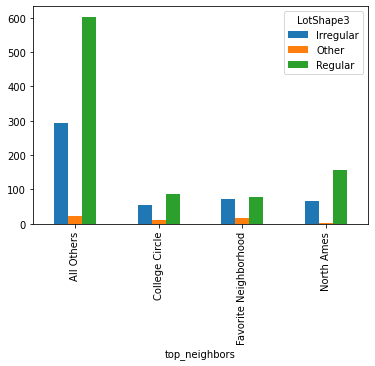

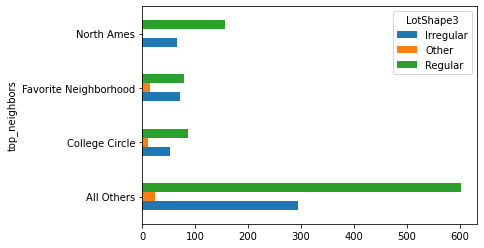

In [0]:
# We can bar-graph some cross tab data to get a better look at it.

# Use crosstab to get some data:
crosstab_results = pd.crosstab(iowa_housing_df['top_neighbors'], 
                               iowa_housing_df['LotShape3'])

# Now to plot the results with a bar graph:
display(crosstab_results.plot(kind='bar'));
# How about we use a Horizontal bar graph:
display(crosstab_results.plot(kind='barh'));



---



---



# WORKING WITH STRINGS IN PANDAS

In [0]:
# Us bash to get retrieve the zip file from desired url:
! wget https://resources.lendingclub.com/LoanStats_201804.csv.zip
# Got a "404: Not Found" error when trying to get the file.

--2020-05-09 14:06:05--  https://resources.lendingclub.com/LoanStats_201804.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 44.225.46.60, 54.201.144.36, 52.89.126.95
Connecting to resources.lendingclub.com (resources.lendingclub.com)|44.225.46.60|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-05-09 14:06:05 ERROR 404: Not Found.



In [0]:
# Decided to attempt another way just to double check the response.
import requests
response = requests.get('https://resources.lendingclub.com/LoanStats_201804.csv.zip')
# Still getting 404 error
response

<Response [404]>

In [0]:
# I remember I downloaded these before from somewhere so i can just load the 
# files from my local system.
from google.colab import files
uploaded = files.upload()

# Had to just use the GUI upload feature, this was going to slow 

Saving LoanStats_2018Q4.csv to LoanStats_2018Q4.csv


In [0]:
# Now that I have my csv file ill read it in.
loans_df = pd.read_csv('LoanStats_2018Q4.csv')
# Display the loans data set
loans_df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                  emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant            2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100       

### The extra rows at the top and bottom of the file have done two things:

1. The top row has made it so that the entire dataset is being interpreted as column headers.

2. The bottom two rows have been read into the 'id' column and are causing every olumn to have at least two `NaN` values in it.

In [0]:
# Here is one of the ways we can fix the header problem.
# By using the 'skiprows' parameter

# I used it with just the skiprows param to see what would happen.
loans_df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)
# Now lets display the changes:
loans_df.tail()

# After looking at the bottom of the dataset there is a footer,
# luckily theres a parameter called 'skipfooter' and we will set it to 2
# since there are 2 footer rows.
# Also by skipping the footer we ar able to address the extra Nans in each column.
loans_df = pd.read_csv('LoanStats_2018Q4.csv', header=1,skipfooter=2)
loans_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,2

In [0]:
# Let's check out the shape of our dataframe
loans_df.shape

(128412, 144)

In [0]:
# Now lets sum up all of the null values by column and sort from least to greatest.
# First lets use pandas 'set_option' method. 

# Ignore this link, it's for me when I use this notebook for notes.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option('display.max_rows', 143)
# Use .sum() then sort all the values in a descending order
loans_df.isnull().sum().sort_values(ascending=False)

id                          128412
member_id                   128412
url                         128412
desc                        128412
settlement_percentage       127661
                             ...  
acc_open_past_24mths             0
chargeoff_within_12_mths         0
delinq_amnt                      0
mo_sin_old_rev_tl_op             0
inq_fi                           0
Length: 144, dtype: int64

## Question:
 Why might LendingClub have included columns in their dataset that are 100% blank?

- ### Answer:
    Maybe they put them there as place holders to use as features at a later time for further data exploration.

In [0]:
# Lets frop an entire column.
loans_df.drop('url',axis=1,inplace=True)
# We could also, instead of useing inplace param, wer could just save it 
# as a new variabls

## Clean up the `int_rate` column.
When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words.

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. lets look at the first 10 values of the `int_rate` column.

In [0]:
# Display the head of int_rate column.
loans_df['int_rate'].head(10)
# Shows it as an object type instead of a float.

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [0]:
# Look at a specific value from the in_rate column
loans_df['int_rate'][3]
# It looks like a string


' 14.47%'

In [0]:
# Now lets confirm that its a string:
type(loans_df['int_rate'][3])

str

Problems that we need to address with this column:
- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that wil help us address these problems.

In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
int_rate = ' 14.47%'

# 1. Remove the leading space
# ALT: int_rate = int_rate[1:]  # Like this or by using the .strip() method
print("Stripping the blank space: ",int_rate.strip())                         # To do it in place
# 2. Remove percent sign
# ALT: int_rate = int_rate[:-2]
print("\nStripping the '%' sign: ",int_rate.strip('%'))
# 3. Removing both:
print("\nStripping both '%' and lead space: ",int_rate.strip().strip('%'),'\n')
# 4. "Cast" the string value to a float
print(float('14.47'),'\n')

# Now lets call all of this together:
print("All together now: ",float(int_rate.strip().strip('%')))

# Let's make sure it's actually a float:
print(type(float(int_rate.strip().strip('%'))))

Stripping the blank space:  14.47%

Stripping the '%' sign:   14.47

Stripping both '%' and lead space:  14.47 

14.47 

All together now:  14.47
<class 'float'>


In [0]:
# We can write a function that can automate this process for us:
def autoFloat(val):
    return float(val.strip().strip('%'))

# Now lets call this function and pass it our int_rate variable:
af_int_rate = autoFloat(int_rate) # stored the function call in a variable

# Check to see if the type was converted
print("Your object is now a ",type(af_int_rate))
# It's confirmed!!

Your object is now a  <class 'float'>


In [0]:
# Using a 'for' loop we can apply this function to every cell.

df_cell_list = []  # Create an empty list.
for cell in loans_df['int_rate']: # Start a for loop to search through 'int_rate' column
    df_cell_list.append(autoFloat(cell)) # Attach every modified cell to the end
                                         # of our new list.
# Check the first 10 values of the list:
for i in df_cell_list[:10]:
    print(i)                                         

16.14
11.8
11.31
14.47
27.27
16.14
12.98
12.98
10.33
23.4


In [0]:
# Lets compair that to the original values:
list(loans_df['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
# Convert the new list to a column using pd.Series:
loans_df['int_rate_clean']=pd.Series(df_cell_list)
# Compare the new and old columns:
loans_df[['int_rate','int_rate_clean']].sample(10)

,int_rate,int_rate_clean
109044,18.94%,18.94
9701,13.56%,13.56
5519,19.92%,19.92
77228,14.47%,14.47
122407,16.14%,16.14
114417,8.46%,8.46
108837,15.02%,15.02
8804,10.72%,10.72
59388,8.81%,8.81
1254,16.14%,16.14


In [0]:
# Lets check the data type of our new column:
loans_df['int_rate_clean'].dtype

dtype('float64')

# BUT WAIT!! THERES A BETTER WAY

In [0]:
# Improve all of this code with the .apply function!
loans_df['int_rate_better_clean'] = loans_df['int_rate'].apply(autoFloat)

In [0]:
# Comparisons of the columns:
loans_df[['int_rate','int_rate_clean','int_rate_better_clean']].sample(10)

,int_rate,int_rate_clean,int_rate_better_clean
33451,7.56%,7.56,7.56
109089,12.73%,12.73,12.73
113420,8.46%,8.46,8.46
93025,7.84%,7.84,7.84
96956,16.91%,16.91,16.91
79251,13.56%,13.56,13.56
27504,17.97%,17.97,17.97
105081,6.67%,6.67,6.67
23452,6.46%,6.46,6.46
109424,8.46%,8.46,8.46


### Lets clean up the emp_title column!
- **First we'll try and diagnose how bad the problem is and what improvements we might be able to make.**

In [0]:
# Look at the top 20 rows
loans_df['emp_title'].head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [0]:
# Look at the top 20 values with the highest count in emplayment titles
loans_df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
# Now lets check to see how many unique elements there are in 'emp_title':
# To do so we need to use '.unique()' method to get all the unique elements.
# Then call pythons built-in 'len()' function to obtain the length of our array.
# which is going to count all the unique elements for us.
print(len(loans_df['emp_title'].unique())) 

# Another option, also an easier option would be to use '.nunique()' method:
print(loans_df['emp_title'].nunique())

# How often is the employment_title null?
# Lets have a look: 
print("Null Sum: ",loans_df['emp_title'].isnull().sum())

43893
43892
Null Sum:  20947


### What are some possible reasons as to why a person's employment title may have not been provided?

In [0]:
# We can try to recreat the problem to get to the conclusion.

# Create some examples that represent the cases that we want to clean up:
examples = ['owner', 'Supervisor', 'Project Manager', np.nan]

# Do that same function in individual steps
print("Data Type = ",type('Supervisor'))
display(isinstance('Supervisor',str))
print()

# What about the strip?
print(' supervisor'.title().strip(),"\n") 

# Write a function to clean up these use cases and increase uniformity.
def cleanTitle(jobtitle):
    if isinstance(jobtitle, str):
        return (jobtitle.title().strip())
    else:
        return 'Unknown'

# Lets go ahead and test the function out.
print("cleanTitle() Test_1: ",cleanTitle(' superviSOR'),"\n")
print("cleanTitle() Test_2: ",cleanTitle(np.nan),"\n\n") 
print('------------------------------------------------------------------------')
# How about a for loop to clean all of our titles? Yes, I think so!!
# Until I fully grasp numpy vectorization ;)
clean_list = []
for jobtitle in examples:
    clean_list.append(cleanTitle(jobtitle))
print("Here is a list of cleaned titles: \n",clean_list)    
print('------------------------------------------------------------------------')

# Now lets do the same thing as the for loop above useing list comprehension.
print("List comprehension : ",[cleanTitle(jobtitle) for jobtitle in examples])
print('------------------------------------------------------------------------')
print()

# Lets not forget about our handy dandy '.apply' method!!
loans_df['clean_title'] = loans_df['emp_title'].apply(cleanTitle)
# Check to see if it works:
clean_emp_title_table = loans_df[['emp_title', 'clean_title']]
display(clean_emp_title_table.sample(20))

Data Type =  <class 'str'>


True


Supervisor 

cleanTitle() Test_1:  Supervisor 

cleanTitle() Test_2:  Unknown 


------------------------------------------------------------------------
Here is a list of cleaned titles: 
 ['Owner', 'Supervisor', 'Project Manager', 'Unknown']
------------------------------------------------------------------------
List comprehension :  ['Owner', 'Supervisor', 'Project Manager', 'Unknown']
------------------------------------------------------------------------



,emp_title,clean_title
48596,Manger Service Trading and Service,Manger Service Trading And Service
122913,NaN,Unknown
48583,NaN,Unknown
77713,Mechanic,Mechanic
40559,Shipping,Shipping
2314,Metrology Manager,Metrology Manager
44563,Manager,Manager
47060,Director of Catering,Director Of Catering
86990,customer service,Customer Service
100602,Digital Programs Manager,Digital Programs Manager


In [0]:
# Let's take a look at the top 20 employment titles
clean_emp_title_table.head(20)

,emp_title,clean_title
0,Sale Consultant,Sale Consultant
1,Educator,Educator
2,Accounts Examiner III,Accounts Examiner Iii
3,teacher,Teacher
4,Claims Analyst,Claims Analyst
5,Training Manager,Training Manager
6,Tire builder,Tire Builder
7,Program Support Assistant,Program Support Assistant
8,Driver,Driver
9,BANKER,Banker


In [0]:
# How many different unique employment titles are there currently?
clean_emp_title_table['emp_title'].nunique()
# The answer is 43892

43892

In [0]:
# How often is the employment_title null?
clean_emp_title_table['emp_title'].isnull().sum()
# The answer is 20947

20947

## Date Time Objects `.dt`
- pandas documentation
  - **to_datetime**
  - **Time/Date Components** "These properties are accessable using the `.dt` accessor.

Many of the most useful date columns in this dataset have the suffix _d to indicate that they correspond to dates.

In [0]:
# List all columns in our dataset with '.columns'
loans_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_better_clean', 'clean_title'],
      dtype='object', length=146)

In [0]:
# Check out one column
loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
# Now lets use a for loop:
issue_date_list = []
for col in loans_df.columns:
    if col.endswith('_d'): # <-----'.endswith() to match the end of a string.
        issue_date_list.append(col)
# Display the list.
issue_date_list        

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# Now as list comprehension:
my_date_cols = [col for col in loans_df.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

Lets take a look at the string format of the `issue_d` column

In [0]:
# dtype
type(loans_df['issue_d'][0])

str

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [0]:
# infer_datetime_format=True:
loans_df['new_issue_d'] = pd.to_datetime(loans_df['issue_d'], infer_datetime_format=True)

In [0]:
# Now lets check to see if this works:
loans_df[['issue_d', 'new_issue_d']].head()

In [0]:
# Check the type of the new data
type(loans_df['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
print(loans_df['new_issue_d'].dtype)
loans_df['new_issue_d'].dtype

datetime64[ns]


dtype('<M8[ns]')

Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

lets look at one of the cells specifically to see what a datetime object looks like:

In [0]:
# Display row 1 to see that ists dtype is showing correctly.
loans_df['new_issue_d'].head(1).values

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
# We can use the .dt accessor to now grab specific parts of the datetime object. 
# Lets grab just the year from all of the cells in the issue_d column.
loans_df['year'] = loans_df['new_issue_d'].dt.year
loans_df[['issue_d','new_issue_d','year']].head()

,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


In [0]:
# Now lets do the month.
loans_df['month'] = loans_df['new_issue_d'].dt.month
loans_df[['issue_d', 'new_issue_d', 'year', 'month']].head()

,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [0]:
# Lets add the weekday now.
loans_df['weekday'] = loans_df['new_issue_d'].dt.weekday
# Now lets display all of our changes.
loans_df[['issue_d', 'new_issue_d','year','month','weekday']].sample(10)

,issue_d,new_issue_d,year,month,weekday
122947,Oct-2018,2018-10-01,2018,10,0
49797,Nov-2018,2018-11-01,2018,11,3
77262,Nov-2018,2018-11-01,2018,11,3
22877,Dec-2018,2018-12-01,2018,12,5
60788,Nov-2018,2018-11-01,2018,11,3
126119,Oct-2018,2018-10-01,2018,10,0
15721,Dec-2018,2018-12-01,2018,12,5
46335,Nov-2018,2018-11-01,2018,11,3
48133,Nov-2018,2018-11-01,2018,11,3
26238,Dec-2018,2018-12-01,2018,12,5


In [0]:
# Now lets add these year and onth values as new columns on our dataframe.
loans_df['new_pull'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df['month_pull'] = loans_df['new_pull'].dt.month
loans_df[['last_credit_pull_d','new_pull','month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


- Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

- We're going to create a new column called `days_from_earliest_credit_to_issue`.

- It's a long column header, but think about how valuable this piece of information could be. Ths number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors **could be a valuable predictor**

In [0]:
# Lets do some date arithmetic to find the difference between 2 columns
loans_df['day_diff'] = loans_df['new_issue_d'] - loans_df['new_pull']
# Now print it to see if it worked
loans_df[['last_credit_pull_d','new_pull','day_diff']].tail()

,last_credit_pull_d,new_pull,day_diff
128407,Nov-2018,2018-11-01,-31 days
128408,Apr-2020,2020-04-01,-548 days
128409,Apr-2020,2020-04-01,-548 days
128410,Apr-2020,2020-04-01,-548 days
128411,Apr-2020,2020-04-01,-548 days


In [0]:
# Lets find the oldest credit history that was involved in Q4 2018.
loans_df['day_diff'].value_counts().sort_index()

-548 days    37088
-517 days    36494
-488 days      518
-487 days    33364
-486 days     1587
-457 days     1527
-456 days     1614
-427 days      393
-426 days     1220
-396 days     2026
-395 days      312
-365 days     1917
-335 days     1455
-334 days      547
-304 days     1475
-274 days      448
-273 days      896
-243 days      692
-242 days      406
-212 days      958
-182 days      483
-181 days      261
-151 days      613
-123 days      141
-121 days      187
-120 days      176
-92 days       274
-90 days       129
-62 days       127
-61 days       209
-31 days       205
-30 days        87
0 days         475
30 days         73
31 days         33
61 days          1
Name: day_diff, dtype: int64



---



---



# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [3]:
# I've decided to use the instacart data to force myself to use these concepts with
# a new data set to better retain the skills from the lecture.

!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-10 01:37:49--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.140.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.140.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  34.2MB/s    in 6.3s    

2020-05-10 01:37:56 (30.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [1]:
# Now lets get a little fancy here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# With this backend, the output of plotting commands is 
# displayed inline within frontends like the Jupyter notebook, directly below 
# the code cell that produced it. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Creating a dataframe variable for each csv file in 
# instacart_2017_05_01 directory.
################################################################################

# Read in 'aisles.csv' file:
aisles_df = pd.read_csv('aisles.csv')
# Display Data:
print("Aisles Data: ")
display(aisles_df.head(3))
print('=========================================================================')

# Read in 'departments.csv' fils:
departments_df = pd.read_csv('departments.csv')
# Display Data:
print("Department Data: ")
display(departments_df.head(3))
print('=========================================================================')

# Read in 'order_products_prior.csv' file:
order_products_prior_df = pd.read_csv('order_products__prior.csv')
# Display Data:
print("Ordered Products Prior Data: ")
display(order_products_prior_df.head(3))
print('=========================================================================')

# Read in 'order_products_train.csv' file:
order_products_train_df = pd.read_csv('order_products__train.csv')
# Display Data:
print("Ordered Products Train Data: ")
display(order_products_train_df.head(3))
print('=========================================================================')

# Read in 'orders.csv' file:
orders_df = pd.read_csv('orders.csv')
# Display Data:
print("Orders Data: ")
display(orders_df.head(3))
print('=========================================================================')

# Read in 'products.csv' file:
products_df = pd.read_csv('products.csv')
# Display Data:
print("Products Data: ")
display(products_df.head(3))

Aisles Data: 


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


Department Data: 


,department_id,department
0,1,frozen
1,2,other
2,3,bakery


Ordered Products Prior Data: 


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


Ordered Products Train Data: 


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


Orders Data: 


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


Products Data: 


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [10]:
# Look at the top 5 rows of 'orders_df':
print("Orders Data")
display(orders_df.head())
# Look at the top 5 rows of 'order_products_prior_df':
# This Data will be used as test data for predictive models.
print("------------------------------------\nPrior Orders Made")
display(order_products_prior_df.head())
# Look at the top 5 rows of 'order_products_train':
# We will use train data for predictive models.
print("------------------------------------\nOrders Train Data")
display(order_products_train_df.head())

Orders Data


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


------------------------------------
Prior Orders Made


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


------------------------------------
Orders Train Data


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Things to note:
- `orders.csv` has all the information about the given order id like;
  - The user.
  - Time of purchase.
  - Days since prior order.  

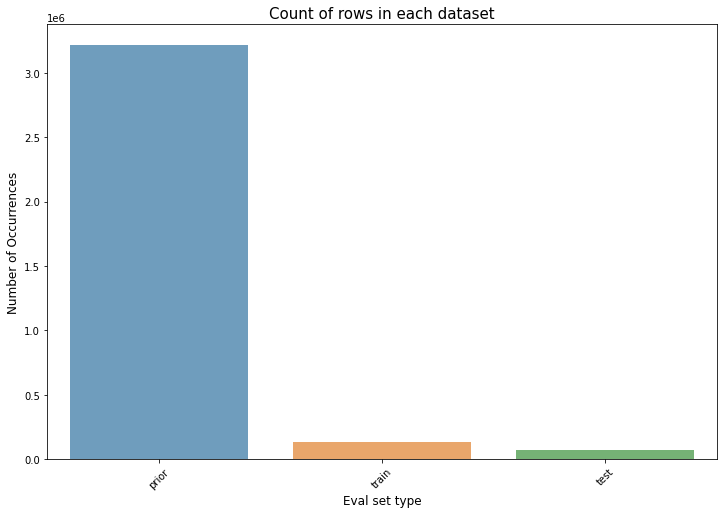

In [22]:
# Let us first get the count of rows in each of the three sets.

# Create a variable for value counts of 'orders_df['eval_set]
count_series = orders_df['eval_set'].value_counts()

plt.figure(figsize=(12,8)) # Set the size of our figure diplay to 12 inches wide
# and 8 inches in height.

# Use 'seaborn' to create a bar plot.
# ----The alpha argument sets the transparency 
sns.barplot(count_series.index, count_series.values, alpha=0.7)

# Name the y axis:
plt.ylabel('Number of Occurrences', fontsize=12)

# Name the x axis:
plt.xlabel('Eval set type', fontsize=12)

# Give the graph a title:
plt.title('Count of rows in each dataset', fontsize=15)

# Rotate just the x axis labels to display at desired angle:
plt.xticks(rotation=45)

# Display the graph to the screen:
plt.show()

In [0]:
f